In [111]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

# reading the data in the VSCode below / leitudas dados no VSCode abaixo:
# after checking the data, sep = ',' was added to make the data display more organized / após verificação dos dados, foi adicionado o sep = ',' para deixar a visualização dos dados mais organizada

df_games = pd.read_csv(r'C:\Users\Rafael\Desktop\Rafael\Bootcamp\Bootcamp-Projects\Bootcamp-Projects-Github\Bootcamp-Project-Video-Games-Ice-Company\games.csv', sep = ',')

# reading the datasets in DataFrames / leitura dos conjuntos de dados em DataFrames

# df_games = pd.read_csv('/Users/Rafael/Desktop/Rafael/Bootcamp/Projects/Bootcamp-Projects-Github/Bootcamp-Project-Video-Games-Ice-Company/games.csv', sep = ',')

In [112]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [113]:
df_games.info() # information about the dataset / informação sobre o conjunto de dados
print()
df_games.isnull().sum() # sum of null values / soma de valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [114]:
df_games.duplicated().sum()

np.int64(0)

Checking the data it's possible to see that we don't have duplicate values, but have null values in different columns and the names are with the initial letter in uppercase

================================================================================================================

Checando os dados podemos verificar que não existem valores duplicados, porém temos valores nulos em diferentes colunas e as colunas tem a letra inicial maiúscula

In [115]:
df_games.columns # columns name / nomes

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [116]:
header = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']
header_low = []

for data in header:
    header_low.append(data.lower()) # lower case columns / letras minúsculas nas colunas

df_games.columns = header_low

df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [117]:
# replacing null values with 'Unknown' or '0' / substituindo valores nulos por 'Unknown' ou '0'

df_games['name'] = df_games['name'].fillna('Unknown')
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)
df_games['genre'] = df_games['genre'].fillna('Unknown')
df_games['critic_score'] = df_games['critic_score'].fillna(0)
df_games['user_score'] = df_games['user_score'].fillna(0)
df_games['rating'] = df_games['rating'].fillna('Unknown')

df_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [118]:
# df_games['user_score'] = df_games['user_score'].replace('tbd', '0') # replacing 'tbd' with '0' / substituindo 'tbd' por '0'

In [119]:
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games['critic_score'] = df_games['critic_score'].astype(int)

Above, the first step was change all the uppercase letters to lowercase. After this adjustment, was replaced all the null values with 'Unknown' or '0' based in the column information and in the user_score column was changed the 'tbd' (to be determined) to '0'. The last change at the dataset was adjust the columns type to the more appropriated.

The columns that we have numbers, the null values was changed to 0 because it's the value that makes the most sense and won't get in the way if you need to use the data to make a sum and to the columns that have written information was changed to unknown once has not a important information and it's better to have a unkown than leave NaN or blank.

The columns year_of_release and critic_score, was changed the type to int because the year will never have decimals and the critic score is always a entire value without decimals.

Null values may occur because the data set is from 2016 and some information may have been lost.

For TDB values (to be determined), it appears in the user_score column, where the value could be changed to 0, however, this could also confuse with a 0 score from users. Therefore, it's better to leave the information still to be determined, as it won't get in the way of our analysis.

================================================================================================================

Acima, a primeira etapa foi alterar todas as letras maiúsculas para minúsculas. Após esse ajuste, todos os valores nulos foram substituídos por 'Unknown' ou '0' com base nas informações da coluna e, na coluna user_score, o valor 'tbd' (a ser determinado) foi alterado para '0'. A última alteração no conjunto de dados foi ajustar o tipo das colunas para o mais apropriado.

As colunas que tinham número, os valores nulos foram altetados para 0, pois é o valor que faz mais sentido e não irá atrapalhar se caso seja necessário usar os dados para fazer uma soma e as colunas que os dados são escritos foram alterados para unknown uma vez que não havia informação importante para a adicionar e também por ser melhor do que deixar apenas NaN ou em branco.

As colunas year_of_release and critic_score, foram alteradas para o tipo int porque um ano nunca terá casas decimais e a nota dos críticos são sempre um valor inteiro sem decimais.

Os valores nulos podem ocorrer porque o conjunto de dados é de 2016 e pode ser que algumas informações foram perdidas.

Para os valores TDB (a ser determinado), aparece na coluna user_score, onde o valor poderia ser alterado para 0, contudo, isso poderia também confundir com uma nota 0 por parte dos usuários. Sendo assim, é melhor deixar com a informação que ainda está por ser determinada, pois não irá atrapalhar em nossa análise.

In [120]:
# sum of the total sales of each region and adding a new column / soma de vendas de cada região e adicionando em uma nova coluna

df_games['total_sales'] = (df_games['na_sales'] +
                           df_games['eu_sales'] +
                           df_games['jp_sales'] +
                           df_games['other_sales'])

print(df_games[['name', 'total_sales']])

                                name  total_sales
0                         Wii Sports        82.54
1                  Super Mario Bros.        40.24
2                     Mario Kart Wii        35.52
3                  Wii Sports Resort        32.77
4           Pokemon Red/Pokemon Blue        31.38
...                              ...          ...
16710  Samurai Warriors: Sanada Maru         0.01
16711               LMA Manager 2007         0.01
16712        Haitaka no Psychedelica         0.01
16713               Spirits & Spells         0.01
16714            Winning Post 8 2016         0.01

[16715 rows x 2 columns]


In [121]:
df_year_of_release = df_games.groupby('year_of_release')['name'].count().reset_index()
df_year_of_release

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


## See how many games were released in different years Is the data for each period significant?

The '0' are the games that we don't know the year of release, but the other games has a variation between the years where some years has more games released than the previous year or vice versa. We can notice too that in the 90's started to have a grow up at the games released but the number get really higher in the 2010's.  

================================================================================================================

## Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

Os '0' são os jogos que não sabemos o ano de lançamento, mas os outros jogos têm uma variação entre os anos, em que alguns anos têm mais jogos lançados do que no ano anterior ou vice-versa. Podemos notar também que na década de 90 começou a haver um crescimento nos jogos lançados, mas o número ficou realmente maior na década de 2010. 

In [122]:
df_80_decade = df_games.query('year_of_release >= 1980 and year_of_release < 1990')
df_90_decade = df_games.query('year_of_release >= 1990 and year_of_release < 2000')
df_2000_decade = df_games.query('year_of_release >= 2000 and year_of_release < 2010')
df_2010_decade = df_games.query('year_of_release >= 2010')

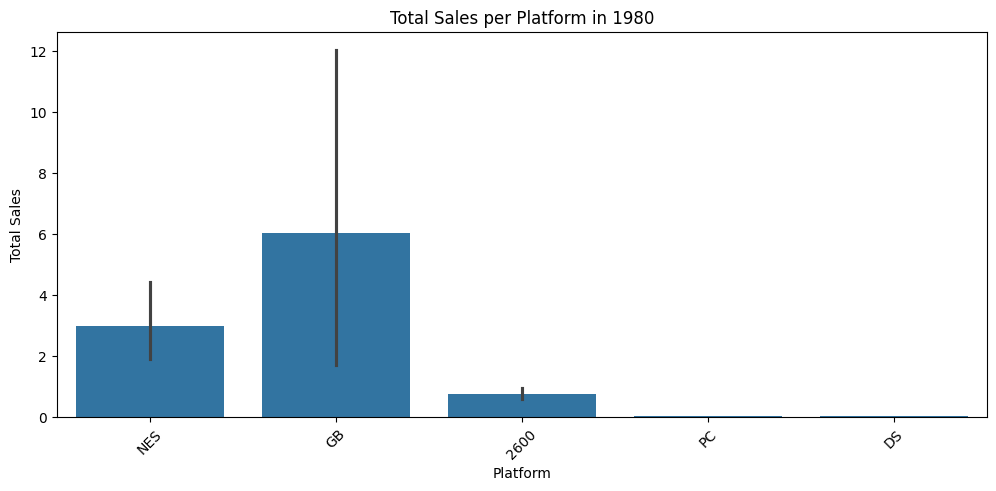

In [123]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_80_decade)
plt.title('Total Sales per Platform in 1980')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

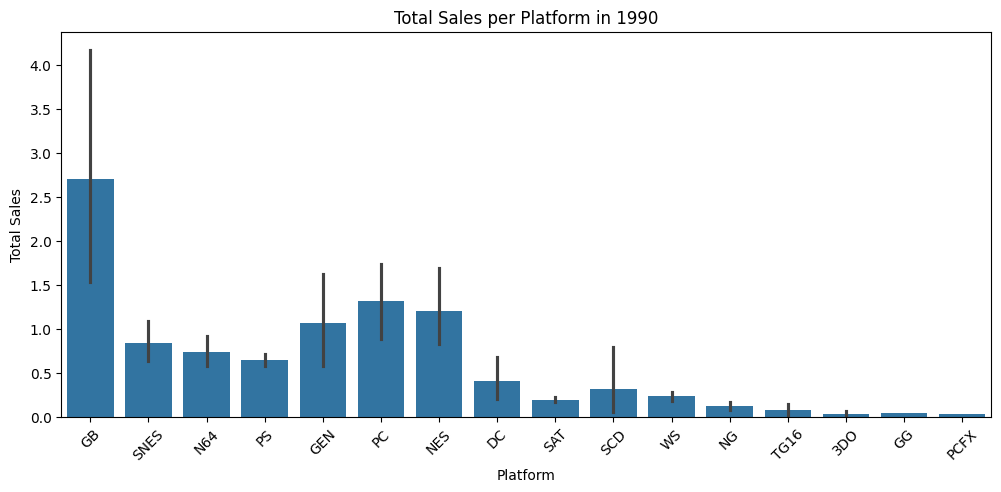

In [124]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_90_decade)
plt.title('Total Sales per Platform in 1990')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

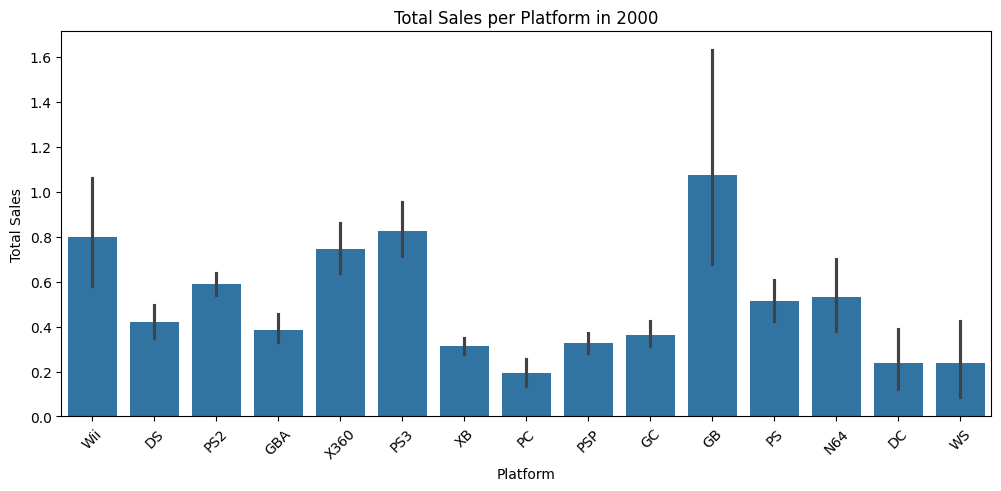

In [125]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_2000_decade)
plt.title('Total Sales per Platform in 2000')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

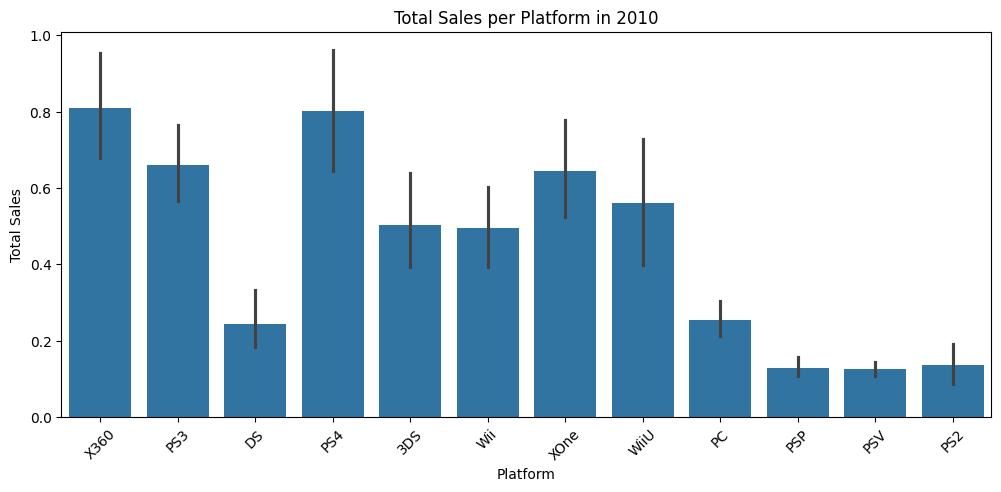

In [126]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'platform', y = 'total_sales', data = df_2010_decade)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## See how sales varied from platform to platform. Choose the platforms with the highest total sales and build a distribution based on data for each year. Find the platforms that used to be popular but now have no sales. How long does it take for new platforms to appear and old ones to disappear?

I've made a selection of the data for each decade and selected the 5 platforms that had the most sales at the time, so that we can analyze which ones emerged in that period and how sales are doing. In the 1980s, we can see that it was still the early days of video games and with that we only have 3 platforms in evidence (NES, GB, 2600), however, when we move on to the 1990s we notice that there has been a significant increase in the number of gaming platforms, with the emergence of new platforms but with some of the previous ones still on the rise (GB, NES, PC, GEN, SNES). When we look at the 2000s, the number of platforms is similar, but with many changes, with new platforms appearing and some old ones no longer on the rise, and we can see that in the top 5 sales only the GB has remained (GB, PS3, X360, Wii, PS2). For the last period of data, we note that we have many platforms similar to 2000, but the emergence of newer models that are growing, with the PS3 and X360 (X360, PS3, PS4, WiiU, XOne) remaining in the top 5 for another period.

================================================================================================================

## Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

Fiz uma seleção dos dados por cada década e selecionei as 5 plataformas que tinham mais venda na altura, de modo que podemos analisar quais foram as que surgiram naquele período e como estão a ser as vendas. Na década de 80, notamos que ainda estava a ser o início dos vídeo-games e com isso temos apenas 3 plataformas em evidência (NES, GB, 2600), contudo, ao passar para a década de 90 reparamos que houve um aumento significativo no número de plataformas de jogos, tendo o surgimento de novas plataformas porém ainda se mantendo em alta algumas anteriores (GB, NES, PC, GEN, SNES). Quando olhamos para a década de 2000, o número de plataformas é semelhante, porém com muitas mudanças tendo novas plataformas surgido e algumas antigas deixadas de estar em alta, podendo reparar que no top 5 de vendas apenas se manteve o GB (GB, PS3, X360, Wii, PS2). Para o último período dos dados, notamos que temos muitas plataformas semelhantes a 2000, mas o surgimento dos modelos mais recentes e que estão em crescimento, tendo se mantido no top 5 por mais um período o PS3 e o X360 (X360, PS3, PS4, WiiU, XOne)

In [127]:
df_sales_per_plataform = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

df_sales_per_plataform

,platform,year_of_release,total_sales
0,2600,0,10.50
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,60.14


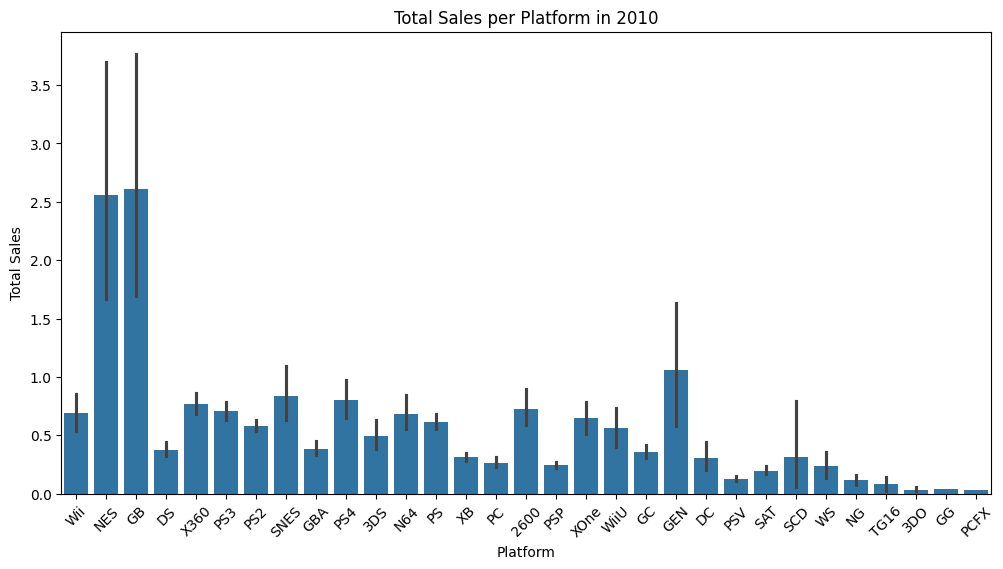

In [128]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'platform', y = 'total_sales', data = df_games)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Determine for which period you should take data. To do this, look at your answers to the previous questions. The data should allow you to build a model for 2017.

Thinking about building a model for 2017, it's not worth taking old data, but we can consider the data we have from the same decade to be able to analyze in a more complete way which platforms are on the rise or not, and the same thing with games.

================================================================================================================

## Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Pensando em construir um modelo para 2017, não vale a pena pegar dados antigos, porém podemos considerar os dados que temos da mesma década para conseguir analisar de uma forma mais completa quais plataformas estão ou não em ascensão e a mesma coisa com os jogos.


In [129]:
df_2010_decade

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,0,0,Unknown,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,Unknown,0.01


In [130]:
df_sales_per_plataform_2010 = df_2010_decade.groupby('platform')['total_sales'].count().reset_index()

df_sales_per_plataform_2010_sorted = df_sales_per_plataform_2010.sort_values(by = 'total_sales', ascending = True)

df_sales_per_plataform_2010_sorted

# df_sales_per_plataform_2010 = df_2010_decade.groupby(['platform', 'year_of_release'])['total_sales'].count().reset_index()

# df_sales_per_plataform_2010_sorted = df_sales_per_plataform_2010.sort_values(by = ['total_sales', 'year_of_release'], ascending = True)

# df_sales_per_plataform_2010_sorted

,platform,total_sales
3,PS2,45
9,WiiU,147
11,XOne,247
5,PS4,392
7,PSV,429
8,Wii,450
2,PC,479
6,PSP,500
1,DS,507
0,3DS,512


## Which platforms are leading in sales? Which are growing or shrinking? Select several potentially profitable platforms.

We can see that the X360 and PS3 platforms lead the ranking with the highest number of sales since 2010, even though there are newer and more recently launched platforms such as XOne and PS4. In addition, portable platforms such as PSP and DS are also on the rise.

However, considering the games to be released in 2017 (information we always have in advance and usually a year or half a year in advance), we should consider the recently released platforms, XOne and Ps4, will be potentially profitable and along with these we can add the PC, as it was starting to stop being the main use with issues related to banking or surfing the internet.

================================================================================================================

## Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

Podemos ver que as plataformas X360 e PS3 lideram o ranking com o maior número de vendas desde 2010, mesmo que já existam plataformas mais novas e lançadas mais recente como XOne e PS4. Além disso, as plataformas portátil como PSP e DS também estão em alta.

Contudo, considerando os jogos a serem lançados em 2017 (informações que temos sempre adiantadas e normalmente com um ano ou meio ano de antecedência), devemos considerar as plataformas lançadas recentemente, XOne e Ps4, serão potencialmente lucrativas e junto a essas podemos adicionar o PC, pois estava começando a deixar de ser o principal uso com questões relacionadas a bancos ou navegar na internet.

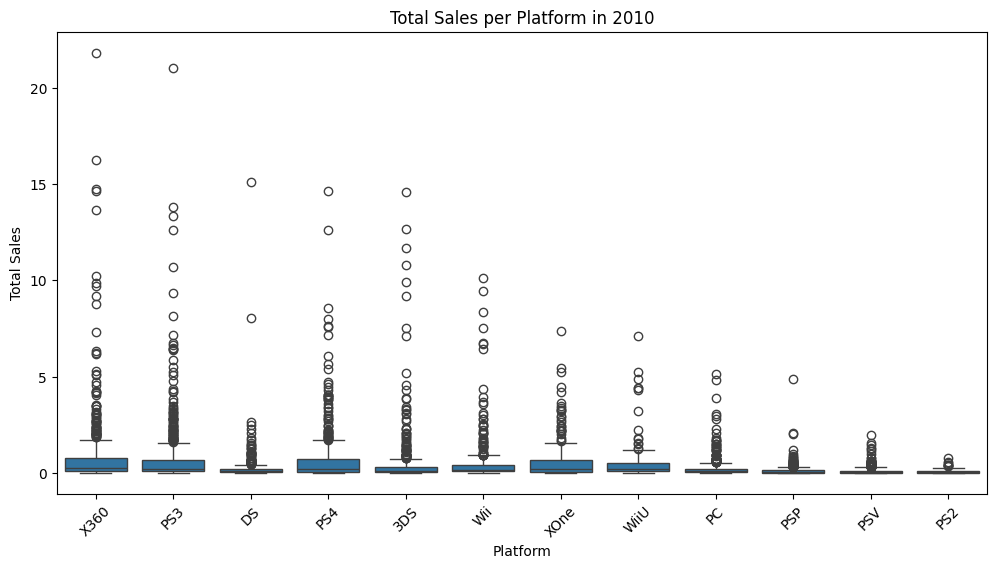

In [131]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'platform', y = 'total_sales', data = df_2010_decade)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [132]:
mean_sales_2010 = df_2010_decade.groupby('platform')['total_sales'].mean()
mean_sales_2010 = mean_sales_2010.sort_values(ascending = True)
mean_sales_2010

platform
PSV     0.125431
PSP     0.128100
PS2     0.135333
DS      0.244083
PC      0.254614
Wii     0.495489
3DS     0.503535
WiiU    0.559116
XOne    0.645020
PS3     0.661125
PS4     0.801378
X360    0.809426
Name: total_sales, dtype: float64

## Build a box diagram for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales across platforms? Describe your findings.

You can see that there is a difference in sales between the console platforms and the portable video games and PC, but if you compare them with each other you can see that there isn't such a significant difference, and they are always close, as you can see from the graphs.

As for average sales, as mentioned above, the most recently launched platforms have higher average sales than previous models, showing that they are on the rise for the coming years.

================================================================================================================

## Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

É possível identificar que existe uma diferença nas vendas entre as plataformas de console para os video games portáteis e PC, contudo, se compararmos entre elas próprias podemos verificar que não há uma diferença tão significativa estando sempre próximas conforme nota-se nos gráficos.

Quanto às médias das vendas, como citado anteriormente, as plataformas lançadas mais recente tem uma maior média de venda do que modelos anteriores, mostrando que estão em ascensão para os próximos anos.

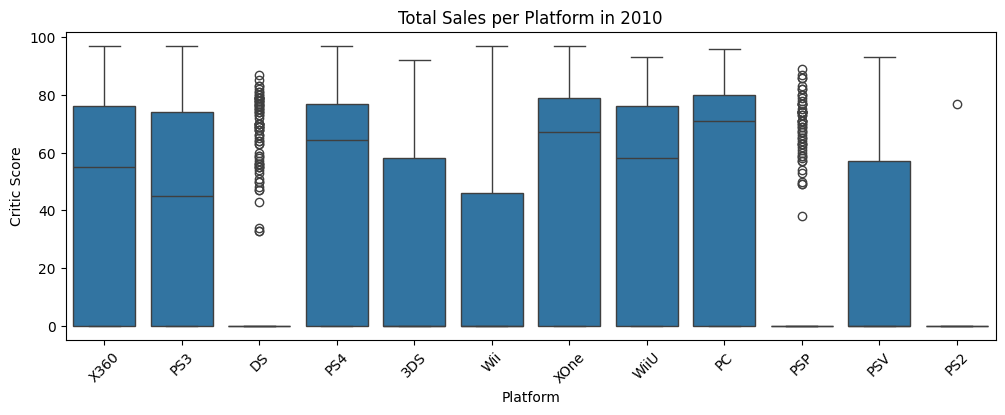

In [133]:
plt.figure(figsize = (12,4))
sns.boxplot(x = 'platform', y = 'critic_score', data = df_2010_decade)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('Critic Score')
plt.xticks(rotation=45)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a int

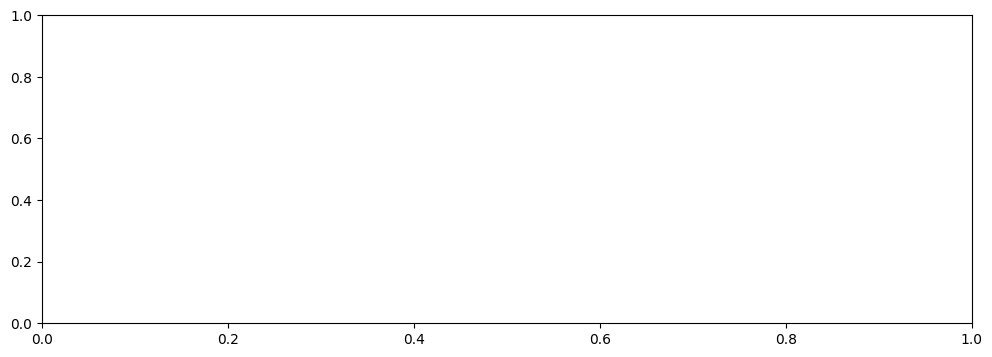

In [134]:
plt.figure(figsize = (12,4))
sns.boxplot(x = 'platform', y = 'user_score', data = df_2010_decade)
plt.title('Total Sales per Platform in 2010')
plt.xlabel('Platform')
plt.ylabel('User Score')
plt.xticks(rotation=45)
plt.show()

Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
Com essas conclusões em mente, compare as vendas em outras plataformas.
Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

## QUESTÕES POR RESPONDER AINDA / ARRUMAR ERRO GRÁFICO

In [139]:
df_na_sales_platform = df_games.groupby(['platform', 'genre', 'rating'])['na_sales'].sum().reset_index()
df_eu_sales_platform = df_games.groupby(['platform', 'genre', 'rating'])['eu_sales'].sum().reset_index()
df_jp_sales_platform = df_games.groupby(['platform', 'genre', 'rating'])['jp_sales'].sum().reset_index()

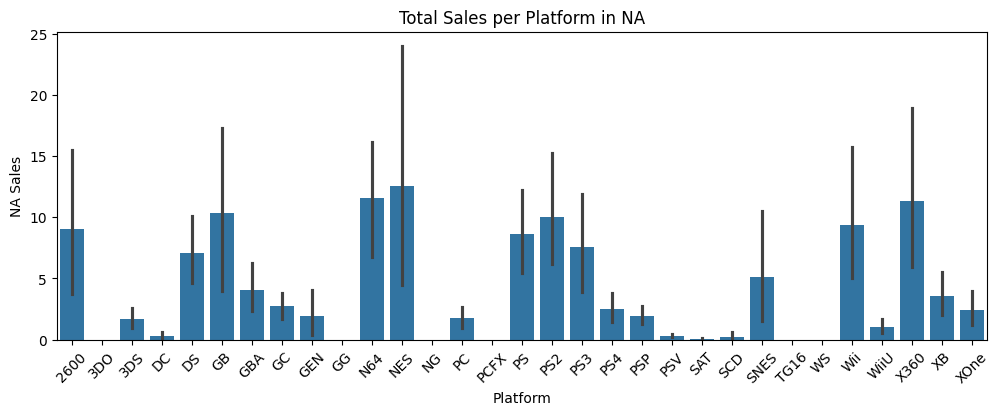

In [145]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'platform', y = 'na_sales', data = df_na_sales_platform)
plt.title('Total Sales per Platform in NA')
plt.xlabel('Platform')
plt.ylabel('NA Sales')
plt.xticks(rotation=45)
plt.show()

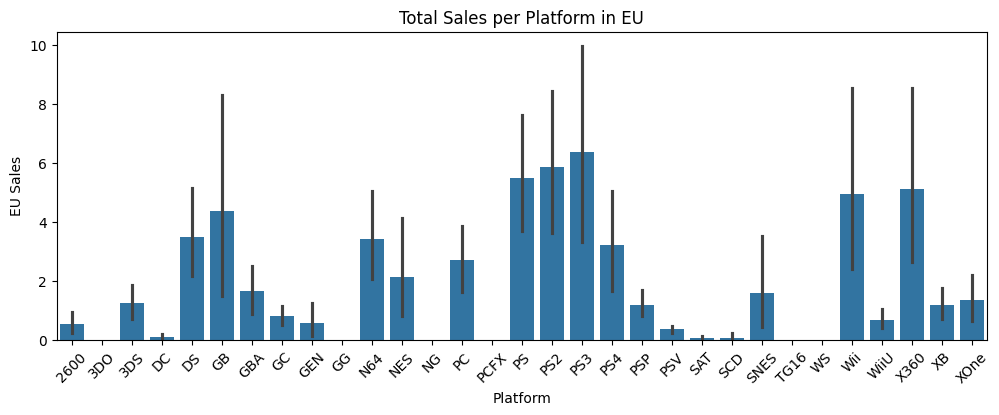

In [146]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'platform', y = 'eu_sales', data = df_eu_sales_platform)
plt.title('Total Sales per Platform in EU')
plt.xlabel('Platform')
plt.ylabel('EU Sales')
plt.xticks(rotation=45)
plt.show()

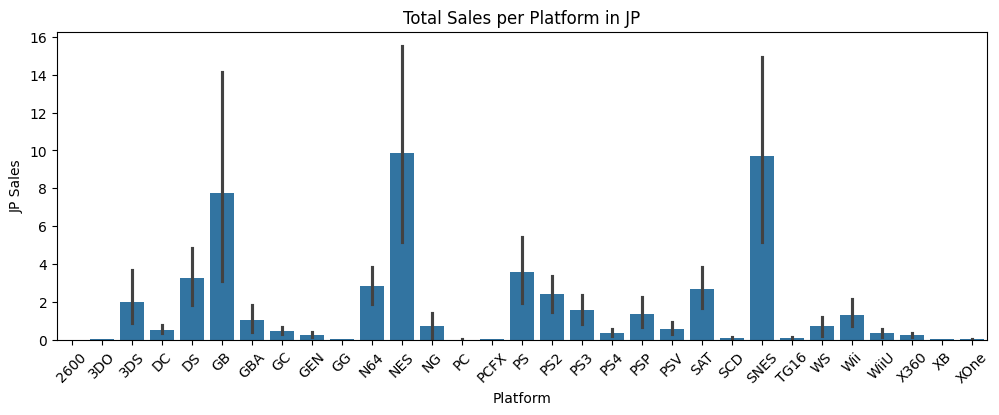

In [147]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'platform', y = 'jp_sales', data = df_jp_sales_platform)
plt.title('Total Sales per Platform in JP')
plt.xlabel('Platform')
plt.ylabel('JP Sales')
plt.xticks(rotation=45)
plt.show()